In [58]:
import os
import cv2
import numpy as np
import pandas as pd

from insightface.app import FaceAnalysis

In [59]:
# configure face analysis
faceapp = FaceAnalysis(name='buffalo_sc',
                       root='insightface_model',
                       providers=['CPUExecutionProvider'])

faceapp.prepare(ctx_id=0, det_size=(640,640), det_thresh=0.5)

#warning : det_thresh less than 0.3 may produce duplicate images

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_sc/det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_sc/w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


#### Extract facial features and labels

In [60]:
import re #regular expression
def class_name(string):
    # keep only alphabets
    string = re.sub(r'[^A-Za-z]',' ',string)
    string = string.title()
    return string

In [61]:
person_info = [] # store all the person info
listdir = os.listdir(path = 'images')
for folder_name in listdir:
    parts = folder_name.split('-')
    if len(parts) == 2:  # Only print if split results in exactly two parts
        role, name = parts
        role = class_name(role)
        name = class_name(name)
        # print('Role =', role, end = '\t')
        # print('Name =', name)

    # path of each image in respective folder
    img_files = os.listdir(path = f'images/{folder_name}')
    for file in img_files:
        path = f'./images/{folder_name}/{file}'
        # step 1:- Read the image
        img_arr = cv2.imread(path)
        
        # step 2:- get the info
        result = faceapp.get(img_arr, max_num=1)

        if len(result) > 0:
        # step 3:- Extract the facial embeddings
            res = result[0]
            embedding = res['embedding']
            # print(embedding)

        # step 4:- save all info name, role, embedddings in a list
        person_info.append([name,role,embedding])
        print(person_info)



[['Barack Obama', 'Teacher', array([ 0.8673735 , -0.26738295,  0.07084316, -0.14424592,  0.23992428,
       -1.2062272 ,  1.2279084 ,  0.18650907, -3.3352292 , -1.0667801 ,
        2.1883855 , -0.07534446,  0.12875813, -0.5122907 ,  0.31550744,
       -2.3731477 ,  1.214216  ,  0.81756616, -0.7520225 , -1.1125612 ,
       -0.48860592,  2.9146843 , -1.250525  ,  0.48914525,  0.7349138 ,
       -0.9183185 , -0.44692105, -0.2182009 ,  2.1838741 , -0.3378279 ,
        0.12942599,  0.65579325, -0.30145258, -0.61934847, -0.20256746,
       -0.81281567, -0.82258207,  0.7754678 ,  1.637594  ,  0.44584084,
        2.8551495 ,  1.1124002 ,  0.64131546, -2.3601308 , -0.42427734,
       -1.4629043 , -1.5767727 , -0.02758843, -1.5355971 , -1.0320768 ,
        0.93481606,  0.79919755,  0.9796771 , -1.1786447 ,  0.3108964 ,
        1.4314246 , -0.4583298 , -1.109055  ,  1.1821282 , -1.1180216 ,
       -0.00363511,  1.1647414 , -1.9670155 ,  1.2048684 ,  0.69400966,
        1.4430667 ,  0.80157065, -1

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[['Barack Obama', 'Teacher', array([ 0.8673735 , -0.26738295,  0.07084316, -0.14424592,  0.23992428,
       -1.2062272 ,  1.2279084 ,  0.18650907, -3.3352292 , -1.0667801 ,
        2.1883855 , -0.07534446,  0.12875813, -0.5122907 ,  0.31550744,
       -2.3731477 ,  1.214216  ,  0.81756616, -0.7520225 , -1.1125612 ,
       -0.48860592,  2.9146843 , -1.250525  ,  0.48914525,  0.7349138 ,
       -0.9183185 , -0.44692105, -0.2182009 ,  2.1838741 , -0.3378279 ,
        0.12942599,  0.65579325, -0.30145258, -0.61934847, -0.20256746,
       -0.81281567, -0.82258207,  0.7754678 ,  1.637594  ,  0.44584084,
        2.8551495 ,  1.1124002 ,  0.64131546, -2.3601308 , -0.42427734,
       -1.4629043 , -1.5767727 , -0.02758843, -1.5355971 , -1.0320768 ,
        0.93481606,  0.79919755,  0.9796771 , -1.1786447 ,  0.3108964 ,
        1.4314246 , -0.4583298 , -1.109055  ,  1.1821282 , -1.1180216 ,
       -0.00363511,  1.1647414 , -1.9670155 ,  1.2048684 ,  0.69400966,
        1.4430667 ,  0.80157065, -1

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[['Barack Obama', 'Teacher', array([ 0.8673735 , -0.26738295,  0.07084316, -0.14424592,  0.23992428,
       -1.2062272 ,  1.2279084 ,  0.18650907, -3.3352292 , -1.0667801 ,
        2.1883855 , -0.07534446,  0.12875813, -0.5122907 ,  0.31550744,
       -2.3731477 ,  1.214216  ,  0.81756616, -0.7520225 , -1.1125612 ,
       -0.48860592,  2.9146843 , -1.250525  ,  0.48914525,  0.7349138 ,
       -0.9183185 , -0.44692105, -0.2182009 ,  2.1838741 , -0.3378279 ,
        0.12942599,  0.65579325, -0.30145258, -0.61934847, -0.20256746,
       -0.81281567, -0.82258207,  0.7754678 ,  1.637594  ,  0.44584084,
        2.8551495 ,  1.1124002 ,  0.64131546, -2.3601308 , -0.42427734,
       -1.4629043 , -1.5767727 , -0.02758843, -1.5355971 , -1.0320768 ,
        0.93481606,  0.79919755,  0.9796771 , -1.1786447 ,  0.3108964 ,
        1.4314246 , -0.4583298 , -1.109055  ,  1.1821282 , -1.1180216 ,
       -0.00363511,  1.1647414 , -1.9670155 ,  1.2048684 ,  0.69400966,
        1.4430667 ,  0.80157065, -1

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[['Barack Obama', 'Teacher', array([ 0.8673735 , -0.26738295,  0.07084316, -0.14424592,  0.23992428,
       -1.2062272 ,  1.2279084 ,  0.18650907, -3.3352292 , -1.0667801 ,
        2.1883855 , -0.07534446,  0.12875813, -0.5122907 ,  0.31550744,
       -2.3731477 ,  1.214216  ,  0.81756616, -0.7520225 , -1.1125612 ,
       -0.48860592,  2.9146843 , -1.250525  ,  0.48914525,  0.7349138 ,
       -0.9183185 , -0.44692105, -0.2182009 ,  2.1838741 , -0.3378279 ,
        0.12942599,  0.65579325, -0.30145258, -0.61934847, -0.20256746,
       -0.81281567, -0.82258207,  0.7754678 ,  1.637594  ,  0.44584084,
        2.8551495 ,  1.1124002 ,  0.64131546, -2.3601308 , -0.42427734,
       -1.4629043 , -1.5767727 , -0.02758843, -1.5355971 , -1.0320768 ,
        0.93481606,  0.79919755,  0.9796771 , -1.1786447 ,  0.3108964 ,
        1.4314246 , -0.4583298 , -1.109055  ,  1.1821282 , -1.1180216 ,
       -0.00363511,  1.1647414 , -1.9670155 ,  1.2048684 ,  0.69400966,
        1.4430667 ,  0.80157065, -1

AttributeError: 'NoneType' object has no attribute 'shape'

In [62]:
df = pd.DataFrame(data=person_info, columns=['Name', 'Role', 'Facial_Features'])
df # store in redis


Name     Role  \
0         Barack Obama  Teacher   
1         Barack Obama  Teacher   
2         Barack Obama  Teacher   
3         Barack Obama  Teacher   
4         Barack Obama  Teacher   
5         Barack Obama  Teacher   
6         Barack Obama  Teacher   
7         Barack Obama  Teacher   
8         Barack Obama  Teacher   
9         Barack Obama  Teacher   
10      Angelina Jolie  Student   
11      Angelina Jolie  Student   
12      Angelina Jolie  Student   
13      Angelina Jolie  Student   
14      Angelina Jolie  Student   
15      Angelina Jolie  Student   
16      Angelina Jolie  Student   
17      Angelina Jolie  Student   
18      Angelina Jolie  Student   
19      Angelina Jolie  Student   
20         Chris Evans  Student   
21         Chris Evans  Student   
22         Chris Evans  Student   
23         Chris Evans  Student   
24         Chris Evans  Student   
25         Chris Evans  Student   
26         Chris Evans  Student   
27         Chris Evans  Student   
28         Chris Evans  Student   
29         Chris Evans  Student   
30      Morgan Freeman  Teacher   
31      Morgan Freeman  Teacher   
32      Morgan Freeman  Teacher   
33      Morgan Freeman  Teacher   
34      Morgan Freeman  Teacher   
35      Morgan Freeman  Teacher   
36      Morgan Freeman  Teacher   
37      Morgan Freeman  Teacher   
38      Morgan Freeman  Teacher   
39      Morgan Freeman  Teacher   
40  Scarlett Johansson  Student   
41  Scarlett Johansson  Student   
42  Scarlett Johansson  Student   
43  Scarlett Johansson  Student   
44  Scarlett Johansson  Student   
45  Scarlett Johansson  Student   
46  Scarlett Johansson  Student   
47  Scarlett Johansson  Student   

                                      Facial_Features  
0   [0.8673735, -0.26738295, 0.07084316, -0.144245...  
1   [1.6962043, -0.9939743, -0.22446093, -1.749665...  
2   [2.2778728, -1.3975235, 1.5622313, -1.4791894,...  
3   [-0.06510454, 0.015647024, -0.8529223, -0.3292...  
4   [0.32965076, -1.2773069, 0.40226, -1.3597898, ...  
5   [1.4112002, -0.4176398, -0.44739914, -1.443525...  
6   [1.6049522, -0.2434915, 0.361045, 0.040729463,...  
7   [0.59006697, 0.435262, 0.359199, -2.8040924, -...  
8   [0.7235684, -0.9436685, -0.087504566, -2.40491...  
9   [0.048348807, -0.49334097, -0.1950737, -1.1232...  
10  [0.86380386, 0.32957157, 0.057516277, -1.45382...  
11  [1.6608819, 1.1625284, -0.409508, -2.6428134, ...  
12  [0.8644359, 0.9438691, 0.426511, -1.1836636, -...  
13  [1.0927775, 1.1685377, -0.28905627, -2.0101695...  
14  [-0.6357792, 1.7902234, 0.5984146, -3.5499356,...  
15  [0.4094968, 1.1816809, -0.99602795, -1.4017165...  
16  [0.42175573, 2.0833771, 1.0647576, -2.2734, -0...  
17  [0.39449015, 0.84417474, -0.6155661, -2.104784...  
18  [0.09012428, -0.41690993, -0.3765069, 0.424012...  
19  [-0.8413425, 1.6630573, -0.74583334, -2.137626...  
20  [1.7493395, -2.1204712, -0.15235284, -0.905992...  
21  [1.8045195, -2.3020306, -1.5800114, -1.1034892...  
22  [1.3117112, -2.0910776, -1.0390381, -1.7984462...  
23  [0.97030306, -1.7581036, -1.3096662, -1.025881...  
24  [0.59088784, -1.415057, -0.67263955, -1.310896...  
25  [-1.1621897, -0.6857745, -0.43852004, -2.87654...  
26  [0.35357335, -0.6974708, -0.3003889, -1.911666...  
27  [0.27377734, -0.8834752, -0.5631213, -0.634759...  
28  [0.44919756, -1.6311909, -0.9512273, -1.542270...  
29  [0.85890293, -1.1002599, -0.7712734, -1.491273...  
30  [-0.26063436, 0.020522445, -0.4195658, 1.67549...  
31  [1.292193, -0.94713616, -0.13665542, 1.0453299...  
32  [-0.27514738, -0.2750575, -0.84177244, 1.27982...  
33  [0.42457685, -1.3476079, -0.658139, 1.724149, ...  
34  [-0.13238159, 0.040729016, 0.62805825, 0.68275...  
35  [0.79384655, -0.48360664, -1.7261112, 0.651572...  
36  [0.4864102, -0.4775929, -1.0033896, 1.2773721,...  
37  [0.524489, -0.52224183, -0.5135569, 0.8273804,...  
38  [0.7716741, -0.6371084, 0.17129219, 0.5513532,...  
39  [1.2277561, -1.5641868, 0.4299571, 0.97194934,...  
40  [0

## Inference

### Step 1:- Read image

In [63]:
# read test image
img_test = cv2.imread("test_images/test_2.jpeg")
cv2.imshow('test_img', img_test)
cv2.waitKey(1)
cv2.destroyAllWindows()


2024-11-16 14:47:27.541 python[65942:2554001] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_bundleIdentifierWithReply:) block performed very slowly (1352.27 secs).
1   HIToolbox                           0x00007ff81514652b _ZN15MenuBarInstance21IsAutoShowHideAllowedEv + 259
2   HIToolbox                           0x00007ff81503f33e _ZN15MenuBarInstance24UpdateAutoShowVisibilityE5Pointh + 34
3   HIToolbox                           0x00007ff814fae81f _ZN15MenuBarInstance16ForEachMenuBarDoEU13block_pointerFvPS_E + 169
4   HIToolbox                           0x00007ff81503f93d _ZN15MenuBarInstance20AutoShowHideObserverEjP14OpaqueEventRefPv + 165
5   HIToolbox                           0x00007ff814fa5bd2 _NotifyEventLoopObservers + 153
6   HIToolbox                           0x00007ff814fd7fb8 PostEventToQueueInternal + 700
7   HIToolbox                           0x00007ff814fd9871 _ZL29CreateAndPostEve

### Step 2:- Extract Features

In [64]:
result_test = faceapp.get(img_test, max_num = 0)
result_test

[{'bbox': array([273.97955 ,  60.671295, 366.92963 , 174.41234 ], dtype=float32),
  'kps': array([[302.56976,  99.04533],
         [343.4274 ,  98.70782],
         [326.8871 , 106.82731],
         [308.97394, 142.07092],
         [341.471  , 141.9084 ]], dtype=float32),
  'det_score': 0.7727717,
  'embedding': array([-1.0794207 , -1.1068168 , -1.2358036 , -1.118475  ,  1.6912842 ,
          1.2587618 , -0.42545325,  1.252941  ,  1.901995  ,  1.1875606 ,
         -2.2458293 ,  2.0359776 , -0.1676985 ,  0.5307625 ,  0.30050367,
         -0.21242397,  0.30540994, -1.0245421 ,  0.23911022,  1.2249302 ,
         -0.31456316, -1.1223108 ,  2.434484  ,  1.028549  ,  0.6132132 ,
         -1.2184048 ,  1.4724443 , -0.37911236, -1.1318498 ,  1.2429037 ,
          1.1630023 ,  0.49364066,  0.9687559 ,  0.03858449,  0.40804666,
         -0.41315138,  0.01751673,  0.3568136 ,  0.9127456 , -0.13435614,
         -1.569441  ,  1.407642  ,  0.9521581 , -0.385253  ,  0.08780563,
         -0.47189444, -0

In [65]:
for i, rt in enumerate(result_test):
    print("Current loop = ",i)
    bbox = rt['bbox'].astype(int)
    score = int(rt['det_score']*100)
    embedd_test = rt['embedding']

Current loop =  0


In [66]:
# considering only one sample for the sake of simplicity
len(embedd_test)

512

In [67]:
embedd_test

array([-1.0794207 , -1.1068168 , -1.2358036 , -1.118475  ,  1.6912842 ,
        1.2587618 , -0.42545325,  1.252941  ,  1.901995  ,  1.1875606 ,
       -2.2458293 ,  2.0359776 , -0.1676985 ,  0.5307625 ,  0.30050367,
       -0.21242397,  0.30540994, -1.0245421 ,  0.23911022,  1.2249302 ,
       -0.31456316, -1.1223108 ,  2.434484  ,  1.028549  ,  0.6132132 ,
       -1.2184048 ,  1.4724443 , -0.37911236, -1.1318498 ,  1.2429037 ,
        1.1630023 ,  0.49364066,  0.9687559 ,  0.03858449,  0.40804666,
       -0.41315138,  0.01751673,  0.3568136 ,  0.9127456 , -0.13435614,
       -1.569441  ,  1.407642  ,  0.9521581 , -0.385253  ,  0.08780563,
       -0.47189444, -0.20714694,  1.1184003 ,  0.7752173 , -0.7488828 ,
       -2.0983331 ,  0.9933038 , -1.8608016 , -2.0646074 , -0.8853901 ,
       -0.03325756,  2.2557647 ,  0.24467278, -0.39156568, -1.257262  ,
       -0.82275516,  0.22220036,  0.5708327 ,  0.37354112, -1.1787833 ,
        0.8612182 ,  0.08324446,  0.71663237,  1.3165768 ,  0.48

#### Algorithm

In [24]:
X_list =  df['Facial_Features'].tolist()
X = np.asarray(X_list)

In [25]:
X.shape

(48, 512)

In [26]:
from sklearn.metrics import pairwise

In [68]:
y = embedd_test.reshape(1,512) # 1 x 512

equlidean_distance = pairwise.euclidean_distances(X,y)
manhattan_distance = pairwise.manhattan_distances(X,y)
cosine_similar = pairwise.cosine_similarity(X,y)

In [69]:
data_search = df.copy()
data_search['equlidean'] = equlidean_distance
data_search['manhattan'] = manhattan_distance
data_search['cosine'] = cosine_similar

In [70]:
data_search.head(2)

Name     Role                                    Facial_Features  \
0  Barack Obama  Teacher  [0.8673735, -0.26738295, 0.07084316, -0.144245...   
1  Barack Obama  Teacher  [1.6962043, -0.9939743, -0.22446093, -1.749665...   

   equlidean   manhattan    cosine  
0  35.686508  644.661649 -0.095851  
1  32.884624  589.938309 -0.134652

In [71]:
import matplotlib.pyplot as plt

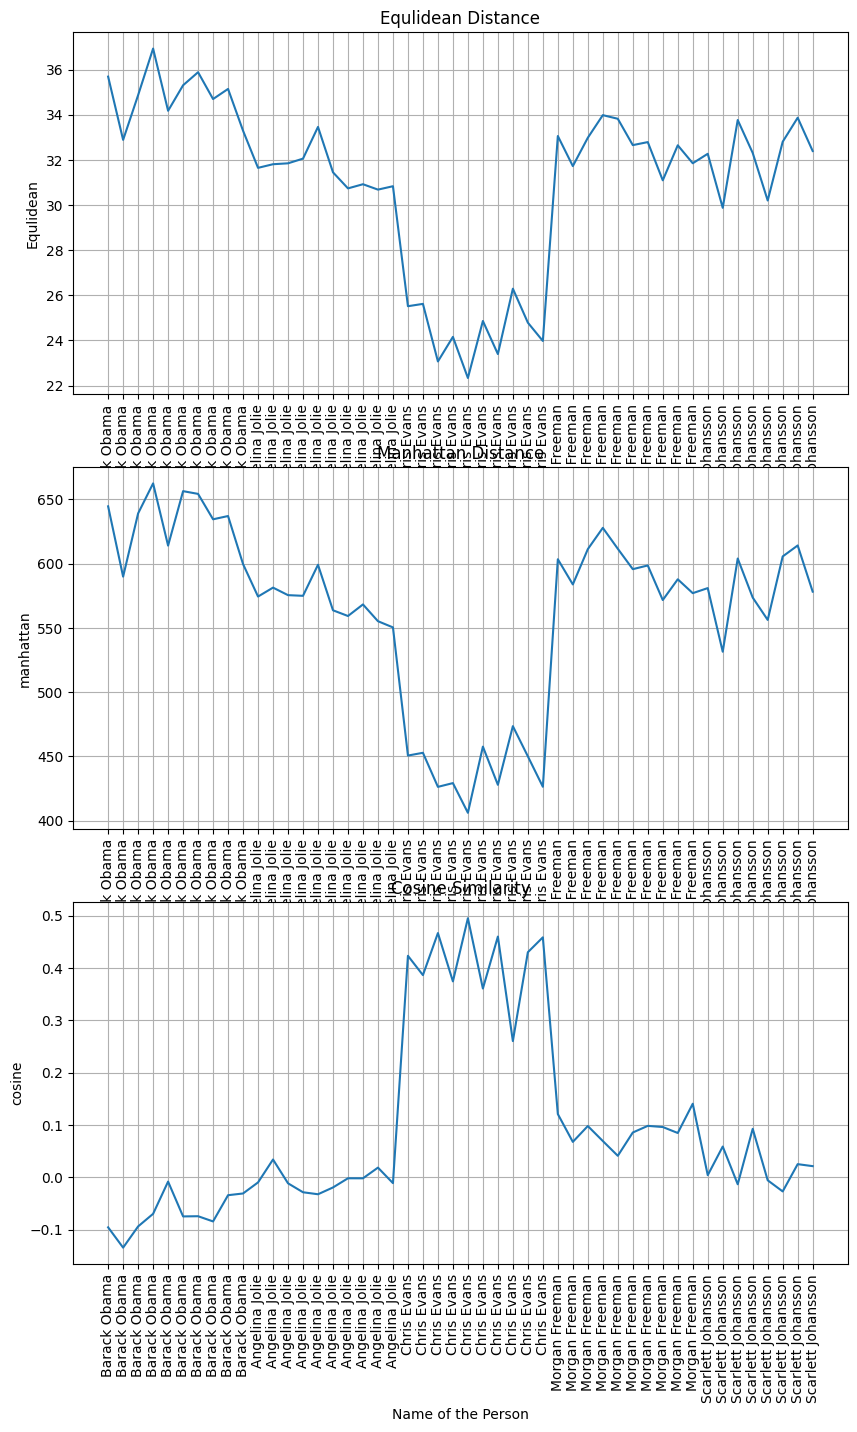

In [72]:
plt.figure(figsize=(10,16))
plt.subplot(3,1,1)
plt.plot(data_search['equlidean'],)
plt.xticks(ticks=list(range(len(data_search['equlidean']))),
           labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('Equlidean')
plt.title('Equlidean Distance')
plt.grid()

plt.subplot(3,1,2)
plt.plot(data_search['manhattan'],)
plt.xticks(ticks=list(range(len(data_search['manhattan']))),
           labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('manhattan')
plt.title('Manhattan Distance')
plt.grid()


plt.subplot(3,1,3)
plt.plot(data_search['cosine'],)
plt.xticks(ticks=list(range(len(data_search['cosine']))),
           labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('cosine')
plt.title('Cosine Similarity')
plt.grid()


plt.show()

### Identify the Person using Equlidean Distance

In [73]:
d_eq_optimal = 25

In [74]:
datafilter = data_search.query(f'equlidean < {d_eq_optimal}')
datafilter.reset_index(drop=True,inplace=True)

if len(datafilter) > 0:
    argmin = datafilter['equlidean'].argmin()
    name , role = datafilter.loc[argmin][['Name','Role']]
    
else:
    name = 'Unknown'
    role = 'Unknown'

In [75]:
print(name, role)

Chris Evans Student


### Identify the Person using Manhattan Distance

In [35]:
d_man_optimal = 450

In [36]:
datafilter = data_search.query(f'manhattan < {d_man_optimal}')
datafilter.reset_index(drop=True,inplace=True)

if len(datafilter) > 0:
    argmin = datafilter['manhattan'].argmin()
    name_man , role_man = datafilter.loc[argmin][['Name','Role']]
    
else:
    name_man = 'Unknown'
    role_man = 'Unknown'

In [37]:
print(name, role)

Chris Evans Student


### Identify the Person using Cosine Similarity

In [76]:
S_opt = 0.4

In [77]:
datafilter = data_search.query(f'cosine > {S_opt}')
datafilter.reset_index(drop=True,inplace=True)

if len(datafilter) > 0:
    argmax = datafilter['cosine'].argmax()
    name_cos , role_cos = datafilter.loc[argmax][['Name','Role']]
    
else:
    name_cos = 'Unknown'
    role_cos = 'Unknown'

In [78]:
print(name_cos, role_cos)

Chris Evans Student


In [79]:
datafilter

Name     Role                                    Facial_Features  \
0  Chris Evans  Student  [1.7493395, -2.1204712, -0.15235284, -0.905992...   
1  Chris Evans  Student  [1.3117112, -2.0910776, -1.0390381, -1.7984462...   
2  Chris Evans  Student  [0.59088784, -1.415057, -0.67263955, -1.310896...   
3  Chris Evans  Student  [0.35357335, -0.6974708, -0.3003889, -1.911666...   
4  Chris Evans  Student  [0.44919756, -1.6311909, -0.9512273, -1.542270...   
5  Chris Evans  Student  [0.85890293, -1.1002599, -0.7712734, -1.491273...   

   equlidean   manhattan    cosine  
0  25.515688  450.676435  0.423313  
1  23.068384  426.310721  0.466807  
2  22.336002  406.118959  0.495197  
3  23.396181  427.901292  0.460122  
4  24.787210  450.066265  0.430155  
5  23.976238  426.379616  0.458642

### Identify Multiple Person in an Image

In [80]:
def ml_search_algorithm(dataframe,feature_column,test_vector,
                        name_role=['Name','Role'],thresh=0.5):
    """
    cosine similarity base search algorithm
    """
    # step-1: take the dataframe (collection of data)
    dataframe = dataframe.copy()
    # step-2: Index face embeding from the dataframe and convert into array
    X_list = dataframe[feature_column].tolist()
    x = np.asarray(X_list)
    
    # step-3: Cal. cosine similarity
    similar = pairwise.cosine_similarity(x,test_vector.reshape(1,-1))
    similar_arr = np.array(similar).flatten()
    dataframe['cosine'] = similar_arr

    # step-4: filter the data
    data_filter = dataframe.query(f'cosine >= {thresh}')
    if len(data_filter) > 0:
        # step-5: get the person name
        data_filter.reset_index(drop=True,inplace=True)
        argmax = data_filter['cosine'].argmax()
        person_name, person_role = data_filter.loc[argmax][name_role]
        
    else:
        person_name = 'Unknown'
        person_role = 'Unknown'
        
    return person_name, person_role

In [ ]:
test_image = cv2.imread('test_images/test_10.jpg')
cv2.imshow('test image',test_image)
cv2.waitKey()
cv2.destroyAllWindows()

1   HIToolbox                           0x00007ff814fcc0c2 _ZN15MenuBarInstance22RemoveAutoShowObserverEv + 30
2   HIToolbox                           0x00007ff814fe3852 SetMenuBarObscured + 226
3   HIToolbox                           0x00007ff814fe34ca _ZN13HIApplication15HandleActivatedEP14OpaqueEventRefhP15OpaqueWindowPtrh + 164
4   HIToolbox                           0x00007ff814fdd996 _ZN13HIApplication13EventObserverEjP14OpaqueEventRefPv + 252
5   HIToolbox                           0x00007ff814fa5bd2 _NotifyEventLoopObservers + 153
6   HIToolbox                           0x00007ff814fdd3e6 AcquireEventFromQueue + 494
7   HIToolbox                           0x00007ff814fcc3ec ReceiveNextEventCommon + 285
8   HIToolbox                           0x00007ff814fcc2b3 _BlockUntilNextEventMatchingListInModeWithFilter + 70
9   AppKit                              0x00007ff80e1c52f3 _DPSNextEvent + 909
10  AppKit                              0x00007ff80e1c4174 -[NSApplication(NSEvent) _nex

In [ ]:
# step-1: take the test image and apply to insight face
results = faceapp.get(test_image)
test_copy = test_image.copy()
# step-2: use for loop and extract each embedding and pass to ml_search_algorithm

for res in results:
    x1, y1, x2, y2 = res['bbox'].astype(int)
    embeddings = res['embedding']
    person_name, person_role = ml_search_algorithm(dataframe_compress,
                                                   'Facial_Features',
                                                   test_vector=embeddings,
                                                   name_role=['Name','Role'],
                                                   thresh=0.5)
    if person_name == 'Unknown':
        color =(0,0,255) # bgr
    else:
        color = (0,255,0)
        
        
    cv2.rectangle(test_copy,(x1,y1),(x2,y2),color)
    
    text_gen = person_name
    cv2.putText(test_copy,text_gen,(x1,y1),cv2.FONT_HERSHEY_DUPLEX,0.7,color,2)
    
    
cv2.imshow('test image',test_copy)
cv2.waitKey()
cv2.destroyAllWindows()

### Compressing my dataset

In [ ]:
dataframe_compress = df.groupby(by=['Name','Role']).mean()
dataframe_compress.reset_index(inplace=True)
dataframe_compress

#### convert dataframe into array and save in numpy zip format

In [ ]:
xvalues = dataframe_compress.values

In [ ]:
col_name = np.array(dataframe_compress.columns)
col_name

In [ ]:
np.savez('dataframe_students_teacher.npz',xvalues,col_name)

In [ ]:
# load the numpy zip
file_np = np.load('dataframe_students_teacher.npz',allow_pickle=True)
file_np.files

In [54]:
pd.DataFrame(file_np['arr_0'],columns=file_np['arr_1'])

Name     Role  \
0      Angelina Jolie  Student   
1        Barack Obama  Teacher   
2         Chris Evans  Student   
3      Morgan Freeman  Teacher   
4  Scarlett Johansson  Student   

                                     Facial_Features  
0  [0.43206447, 1.075011, -0.1285299, -1.8333918,...  
1  [0.94841325, -0.5583419, 0.09482177, -1.279714...  
2  [0.7200023, -1.4684912, -0.7778238, -1.4601221...  
3  [0.48527828, -0.6193287, -0.40698832, 1.068717...  
4  [0.3408678, -0.5793298, -1.7011663, 0.35731304...